In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("avocado.csv") #loading the dataset

In [3]:
Data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
Data.shape #checking the row and column

(18249, 14)

In [5]:
Data.drop('Unnamed: 0',axis=1,inplace=True) #dropping the unnecessary column

In [6]:
Data['type'].unique() #checking the object data type

array(['conventional', 'organic'], dtype=object)

In [7]:
Data['region'].unique() #checking the object data type

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
Data['type']=Data['type'].replace({'conventional':0,'organic':1}) #Changing the data type

In [9]:
Data['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int64

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
OE= OrdinalEncoder()
Encode= OE.fit_transform(Data[["region"]])
Encode

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [53.],
       [53.],
       [53.]])

In [12]:
Data["region"]=Encode #assigning the encoded values to the main value in dataset

In [13]:
Data.isnull().sum() #Checking the null values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
#No null values

In [15]:
Data.count()

Date            18249
AveragePrice    18249
Total Volume    18249
4046            18249
4225            18249
4770            18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

In [16]:
#No non empty values

In [17]:
Data['XLarge Bags'].unique() #Checking the values for XLarge bags

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [18]:
Data.info() #Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int64  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.8+ MB


In [19]:
#Date and Year has no relation to Region and Average price, hence it can be dropped as well

In [20]:
Data.drop(['Date','year'],axis=1,inplace=True)

In [21]:
Data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53.0


In [22]:
Data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000


In [23]:
#From the above data, following can be concluded:
#1. Type and region will not be considered here as they have been transformed from object data type
#2. There is a difference in mean and standard deviation for Total Volume, Total bags,Small bags and XLarge bags
#3. There is a huge difference between the min and max values for Xlarge Bags

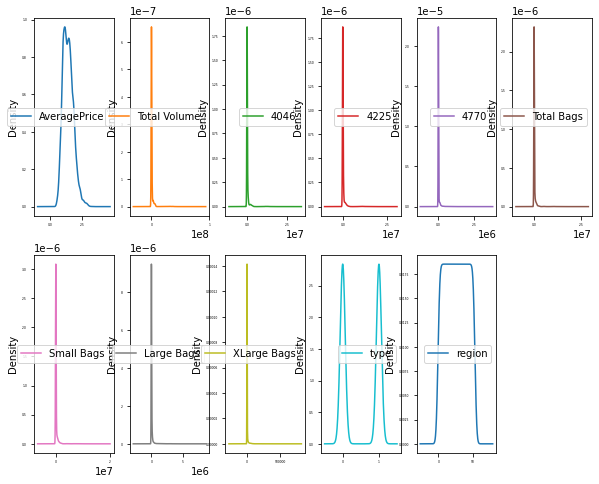

In [24]:
Data.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [25]:
# Data is extremely skewed from total volume to XLarge Bags

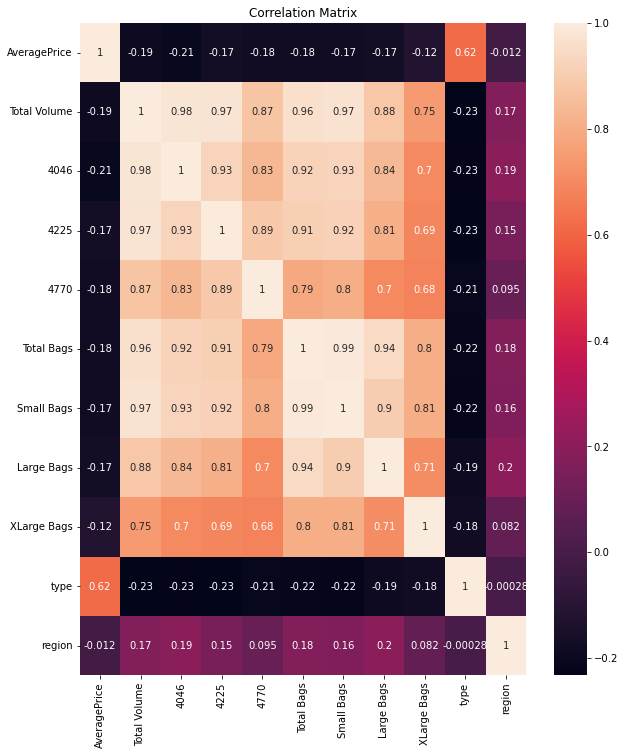

In [26]:
corr_mat=Data.corr()  #Checking correlation
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [27]:
# There is a huge multicolinearity present in the data.
#From the heat map- Total bags have a huge multicollinearity with all features

In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data

,feature,VIF
0,AveragePrice,5.896036e+00
1,Total Volume,5.212418e+09
2,4046,6.946977e+08
3,4225,6.332964e+08
4,4770,4.973362e+06
5,Total Bags,2.502000e+14
6,Small Bags,1.429714e+14
7,Large Bags,1.521486e+13
8,XLarge Bags,7.855572e+10
9,type,2.981761e+00


In [29]:
# In VIF, XLarge bags has the multicollinearity.
# Total bags will be a sumation of Small, Large and X Large bags.
# Therefore there will be changes in data by dropping it

In [30]:
Data.drop('Total Bags',axis=1,inplace=True)

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data

,feature,VIF
0,AveragePrice,5.895874e+00
1,Total Volume,5.212406e+09
2,4046,6.946963e+08
3,4225,6.332951e+08
4,4770,4.973352e+06
5,Small Bags,2.430958e+08
6,Large Bags,2.573994e+07
7,XLarge Bags,1.329108e+05
8,type,2.981597e+00
9,region,3.582558e+00


In [50]:
X=Data.drop('AveragePrice',axis=1)
Y=Data['AveragePrice'] #Differentiating the target and feature variable

In [51]:
X.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
type             0.000329
region           0.000030
dtype: float64

In [52]:
from sklearn.preprocessing import power_transform

In [53]:
X_New=power_transform(X) # Transforming the values to reduce skewness

In [54]:
pd.DataFrame(X_New,columns=X.columns).skew().sort_values(ascending=False)

XLarge Bags     0.793520
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
type            0.000329
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
region         -0.261443
dtype: float64

In [55]:
X=pd.DataFrame(X_New,columns=X.columns) #assigning the old values

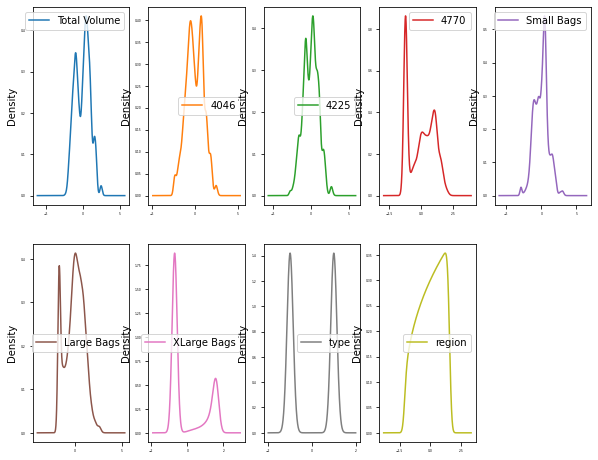

In [56]:
X.plot(kind='kde',subplots=True,layout=(2,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [57]:
X.isnull().sum()

Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

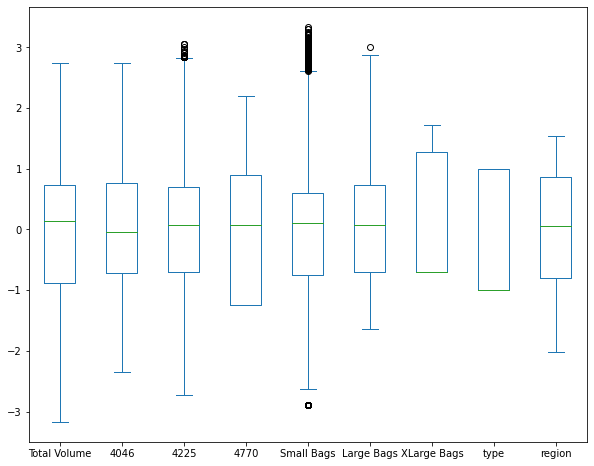

In [58]:
X.plot(kind='box',figsize=(10,8),layout=(6,6))
plt.show() #checking for oultiers

In [59]:
# data shows presence of Outliers, however values are less than 3

In [60]:
from scipy.stats import zscore

In [61]:
(np.abs(zscore(X)>3)).all()

Total Volume    False
4046            False
4225            False
4770            False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
region          False
dtype: bool

In [62]:
Scalar=StandardScaler() #scaling the data

In [63]:
X_Scaled=Scalar.fit_transform(X)
#scaling the features

In [64]:
X.isnull().sum()

Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

# Linear Regression

In [66]:
LR=LinearRegression()

In [67]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 48.169144669156985
/n
At random state 1 the testing accurancy is:- 49.597588222361466
/n
At random state 2 the testing accurancy is:- 48.34132879614662
/n
At random state 3 the testing accurancy is:- 49.093531578677705
/n
At random state 4 the testing accurancy is:- 47.02025328584263
/n
At random state 5 the testing accurancy is:- 48.291452955598565
/n
At random state 6 the testing accurancy is:- 49.70270237770021
/n
At random state 7 the testing accurancy is:- 48.4335852562373
/n
At random state 8 the testing accurancy is:- 49.17249545259826
/n
At random state 9 the testing accurancy is:- 47.73125550808268
/n
At random state 10 the testing accurancy is:- 49.32499870972381
/n
At random state 11 the testing accurancy is:- 48.52178140873301
/n
At random state 12 the testing accurancy is:- 48.76227019223802
/n
At random state 13 the testing accurancy is:- 48.14731389370495
/n
At random state 14 the testing accurancy is:- 49.36600640556269
/n
At

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=77)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)

In [69]:
LR_Score= r2_score(y_test,pred_test)*100
LR_Score

50.12994174947893

# Random Forest Regressor

In [70]:
RF=RandomForestRegressor()

In [72]:
for i in range (0,10):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    RF.fit(X_train,y_train)
    pred_test=RF.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 81.80536427471675
/n
At random state 1 the testing accurancy is:- 82.63024469377969
/n
At random state 2 the testing accurancy is:- 82.20932204475689
/n
At random state 3 the testing accurancy is:- 82.2138678192398
/n
At random state 4 the testing accurancy is:- 81.32188807080816
/n
At random state 5 the testing accurancy is:- 80.99649372296062
/n
At random state 6 the testing accurancy is:- 83.15895475652025
/n
At random state 7 the testing accurancy is:- 81.85710306351338
/n
At random state 8 the testing accurancy is:- 83.41283069749957
/n
At random state 9 the testing accurancy is:- 81.63116220651375
/n


In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=8)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)

In [74]:
RF_Score= r2_score(y_test,pred_test)*100
RF_Score

83.39318547643121

# Gradient Boosting

In [75]:
GB=GradientBoostingRegressor()

In [76]:
for i in range (0,10):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 63.364854364167876
/n
At random state 1 the testing accurancy is:- 64.573261882559
/n
At random state 2 the testing accurancy is:- 64.47620395770906
/n
At random state 3 the testing accurancy is:- 63.5712006508217
/n
At random state 4 the testing accurancy is:- 62.62110027121663
/n
At random state 5 the testing accurancy is:- 63.421583351671394
/n
At random state 6 the testing accurancy is:- 64.58805644420225
/n
At random state 7 the testing accurancy is:- 63.63759979273424
/n
At random state 8 the testing accurancy is:- 64.70321233264555
/n
At random state 9 the testing accurancy is:- 62.37148308198262
/n


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=8)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

In [79]:
GB_Score= r2_score(y_test,pred_test)*100
GB_Score

64.70321233264555

# Lasso Regression

In [77]:
from sklearn.linear_model import Lasso,LassoCV

In [80]:
LassCV=LassoCV(alphas=None,max_iter=100,normalize=True)
LassCV.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [81]:
alpha=LassCV.alpha_
alpha #getting the correct alpha value

2.061286365677574e-06

In [82]:
LassReg=Lasso(alpha)
LassReg.fit(X_train,y_train) #Training the model with correct alpha value

Lasso(alpha=2.061286365677574e-06)

In [83]:
Lass_predict=LassReg.predict(X_test)

In [84]:
LassReg_Score=r2_score(y_test,Lass_predict)*100
LassReg_Score

49.17262914086694

### In comparison to rest of the models random forest classifier gave the best score so far

# Cross Validation for LR

In [85]:
for i in range(2,10):
    LR_Val=cross_val_score(LR,X,Y,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is -1.1608414014669484
The cross validation score for 3 is -0.06106516357145834
The cross validation score for 4 is -0.148205115958656
The cross validation score for 5 is 0.01558845232788426
The cross validation score for 6 is -0.06186227107966449
The cross validation score for 7 is -0.004568549782924107
The cross validation score for 8 is -0.026301166273667284
The cross validation score for 9 is 0.03610856349152942


# Cross Validation for RF

In [86]:
for i in range(2,10):
    RF_Val=cross_val_score(RF,X,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is -199.20449914795356
The cross validation score for 3 is 11.940927289862742
The cross validation score for 4 is -9.416468061986766
The cross validation score for 5 is 15.930553742657619
The cross validation score for 6 is 15.790547300463015
The cross validation score for 7 is 29.203895091320476
The cross validation score for 8 is 24.386117806120488
The cross validation score for 9 is 29.153607925992837


# Cross Validation for GB

In [87]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is -289.3291195318532
The cross validation score for 3 is 7.838546589667568
The cross validation score for 4 is -5.440688081623427
The cross validation score for 5 is 14.961982769761434


# Cross Validation for Lass Reg

In [88]:
for i in range(2,6):
    LassReg_Val=cross_val_score(LassReg,X,Y,cv=i)
    print("The cross validation score for",i,"is",LassReg_Val.mean()*100)

The cross validation score for 2 is -112.15141132616107
The cross validation score for 3 is -6.107926100190575
The cross validation score for 4 is -14.82007790537208
The cross validation score for 5 is 1.5586542135958736


In [89]:
### From the above cross validation score, all the models are overfitted

# Hyper parameter Tuning

In [90]:
#Random Forest is being chosen as it has the highest score

In [91]:
RFC=RandomForestRegressor()

In [93]:
parameters={'max_depth':(list(range(10,11))),'min_samples_split':(list(range(4,5))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(RFC,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [4]})

In [94]:
RFC=RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=8)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [97]:
RFC_Score=r2_score(y_test,pred_test)
RFC_Score

0.7693209949829225

In [98]:
#The score for random forest reduced after hypertuning

In [99]:
RFC=RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4)

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=8)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [101]:
RFC_Score=r2_score(y_test,pred_test)
RFC_Score

0.8247598692782302

In [105]:
RFC=RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=4)

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=8)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [107]:
RFC_Score=r2_score(y_test,pred_test)
RFC_Score

0.8264464652236955

In [111]:
RFC=RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=4,max_features='log2')

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=8)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [113]:
RFC_Score=r2_score(y_test,pred_test)
RFC_Score

0.834931564179201

In [114]:
#Score increased than that of the original Random Forest Classifier Score

# Saving the model

In [115]:
import pickle
filename='Avocado Project.pkl'
pickle.dump(RFC,open(filename,'wb'))